In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [16]:
class Compartment:
    def __init__(self, MTTF, Duty_Cycle,MTTR,question): # αρχικοποίηση της κλάσης
        # έχουμε δωσμένα MTTR, Duty Cycle και MTTR
        # ορ΄ίζουμε μεταβλητή για την κατάσταση του εξαρτήματος
        # και για το αν έχουμε ή όχι επιδιόρθωση το διαχωρίζουμε ανάλογα με το ερώτημα
        self.MTTF = MTTF
        self.Duty_Cycle = Duty_Cycle
        self.MTTR = MTTR
        self.state=1 #1 = working, 0 = standby, -1 = failure
        self.question=question
    
   
    
    def refresh(self):
        # πρώτα ελέγχω αν το εξάρτημα δεν έχει βλάβη
        # διαλέγω έναν τυχαίο αριθμό μέχρι το 1, και αν είναι μικρότερος του Duty Cycle θα έχω κατάσταση λειτουργίας
        if (self.state!=-1):
            if (np.random.random() < self.Duty_Cycle):
                self.state=1
            else:
                self.state=0
            
        # 1/MTTF σε κάθε ώρα πιθανότητα αν λειτουργεί για να πάθει βλάβη           
        if ( np.random.randint(self.MTTF)==0 and self.state==1):
            self.state=-1
        # 1/MTTR πιθανότητα αν έχει βλάβη να επιδιορθωθεί
        if ( np.random.randint(self.MTTR)==0 and self.state==-1 and self.question==2):
            self.state=1
        # γίνονται με αυτή τη σειρά διότι μπορεί αν υπάρξει βλάβη να επιδιορθωθεί άμεσα

# θα χρειαστεί για να έχουμε χρώματα στο plot
# διαβάζουμε σειριακά και αν λειτουργεί έχει μαύρο χρώμα
# ενώ αν έχει βλάβη έχει κόκκινο χρώμα
def match_colors(comp_working):
    colors=[]
    for i in range(0,1500):
        if (comp_working[i]>0):
            colors.append('black')
        else:
            colors.append('red')  
    return colors

In [17]:
# ορίζουμε τα 5 εξαρτήματα για το πρώτο ερώτημα
C1=Compartment(37,0.7,10,1)
C2=Compartment(20,1,10,1)
C3=Compartment(20,1,10,1)
C4=Compartment(20,1,10,1)
C5=Compartment(37,0.7,10,1)

In [18]:
# έχουμε να δουλέψουμε σε 150 ώρες 
time=np.arange(0,150,0.1)
# τύπος αξιοπιστίας
C1Reliability=np.exp(-time*C1.Duty_Cycle*(1/C1.MTTF))
p1=C1Reliability
C2Reliability=np.exp(-time*C2.Duty_Cycle*(1/C2.MTTF))
p2=C2Reliability

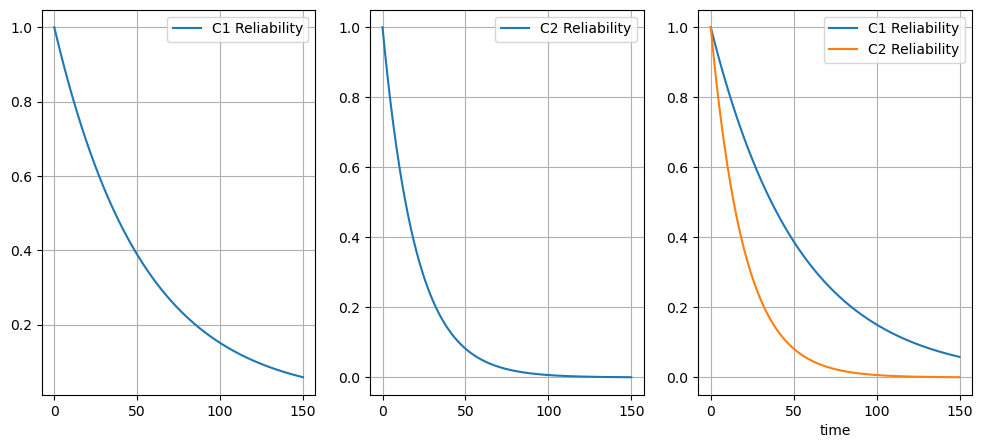

In [19]:
# plots
fig , ax = plt.subplots(1,3,figsize=(12,5) )
ax[0].plot(time,p1,label='C1 Reliability')
ax[0].grid()
ax[0].legend()
plt.xlabel("time")


ax[1].plot(time,p2,label='C2 Reliability')
ax[1].grid()
ax[1].legend()


ax[2].plot(time,p1,label='C1 Reliability')
ax[2].plot(time,p2,label='C2 Reliability')
ax[2].grid()
ax[2].legend()

plt.show()

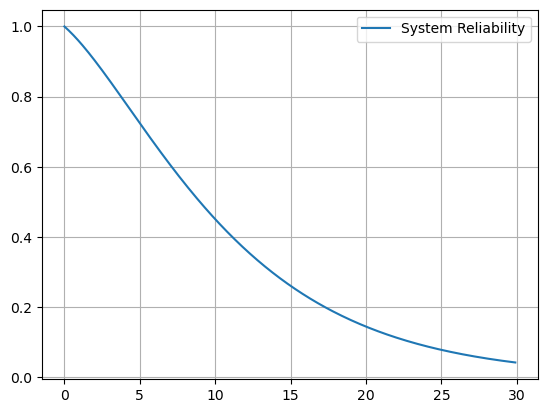

In [20]:
# τύπος για την αξιοπιστία του συστήματος 
# έχουμε στην σειρά c1,c5 και 2/3G c2,3,4 
systemp=(p1*(3*p2**2-2*p2**3)*p1)
plt.plot(time[:300],systemp[:300],label='System Reliability')
plt.grid()
plt.legend()
plt.show()

In [21]:
# τρέχουμε 1000 επαναλήψεις για να μετρήσουμε τα πειραματικά μεγέθη
index1=np.zeros(1000)
for j in range(0,1000):
    # στην αρχή κάθε επανάληψης ορίζουμε ξανά το εξάρτημα διότι το πειράζουμε μέσα στην επανάληψη
    C1=Compartment(37,0.7,10,1)
    # σύμβαση ότι δεν ξεκινάμε από το 0
    for i in range(1,time.shape[0]):
        if (   round( i%10 , 2) ==0 ):
        # η αρχή κάθε ώρας είναι τα i που είναι πολλαπλάσια του 10 δηλαδή 0 , 10 , 20 κλπ και τότε γίνεται refresh το εξάρτημα
            C1.refresh()
        # αν πάθει βλάβη κρατάμε σε ποιά χρονική στιγμή έπαθε την βλάβη και έπειτα 
        # αφού δεν έχουμε επιδιόρθωση κάνουμε break για να τελειώσει το loop
        if (C1.state==-1):
            index1[j]=i/10
            break
            
# print το MTTF
print('For compartment C1: Mean MTTF=',index1.mean(),'hours.')

# όμοια για το άλλο εξάρτημα
index2=np.zeros(1000)
for j in range(0,1000):
    C2=Compartment(20,1,10,1)
    for i in range(1,time.shape[0]):
        if (   round( i%10 , 2) ==0 ):
            C2.refresh()
        if (C2.state==-1):
            index2[j]=i/10
            break
            
print('For compartment C2: Mean MTTF=',index2.mean(),'hours.')

For compartment C1: Mean MTTF= 40.751 hours.
For compartment C2: Mean MTTF= 20.348 hours.


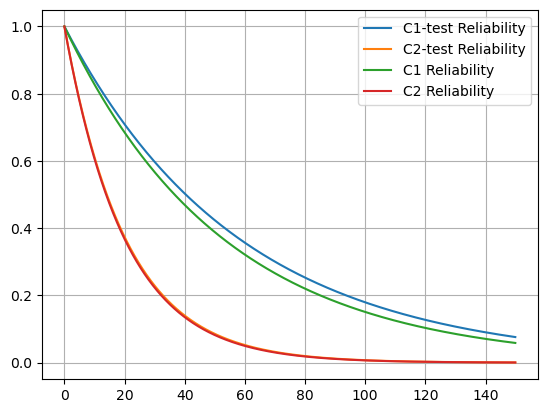

In [22]:
# όπως πριν ορίζουμε την συνάρτηση αξιοπιστίας 
# και την κάνουμε plot
l1=index1.mean()
l2=index2.mean()
p1t=np.exp(-time*C1.Duty_Cycle/l1)
p2t=np.exp(-time*C2.Duty_Cycle/l2)
plt.plot(time,p1t,label='C1-test Reliability')
plt.plot(time,p2t,label='C2-test Reliability')
plt.plot(time,p1,label='C1 Reliability')
plt.plot(time,p2,label='C2 Reliability')
plt.legend()
plt.grid()
plt.show()

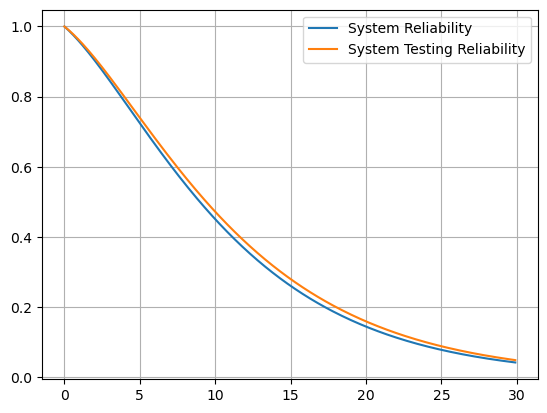

Formula:System MTTF= 8.411366711772665 
	 System Testing MTTF= 11.107085885995833


In [52]:
# το ίδιο και για το σύστημα
systempt=(p1t*(3*p2t**2-2*p2t**3)*p1t)
plt.plot(time[:300],systemp[:300],label='System Reliability')
plt.plot(time[:300],systempt[:300],label='System Testing Reliability')
plt.legend()
plt.grid()
plt.show()
print('Formula:System MTTF=',1/(5/6/C2.MTTF/C2.Duty_Cycle + 2/C1.MTTF/C1.Duty_Cycle) ,'\n\t System Testing MTTF=' , 1/(5/6/l2+2/l1) )

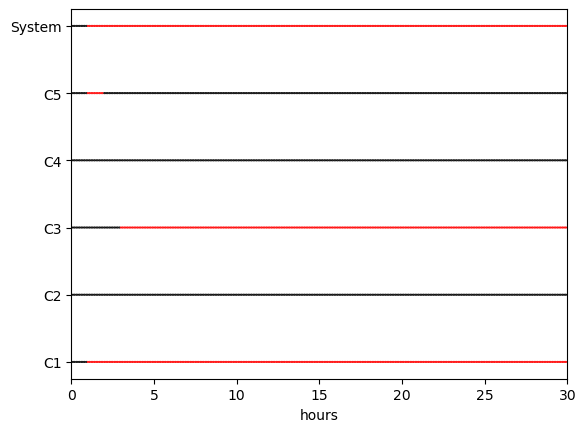

In [40]:
# πειραμα για να δούμε τη μετάβαση των καταστάσεων (χωρίς επισκευή)

C1=Compartment(37,0.7,10,1)
C2=Compartment(20,1,10,1)
C3=Compartment(20,1,10,1)
C4=Compartment(20,1,10,1)
C5=Compartment(37,0.7,10,1)
# ορίζουμε πίνακα για το κάθε εξάρτημα που κάθε χρονική στιγμή μας λέει αν έχει βλάβη ή όχι
# 1 αν δεν έχει βλάβη(δηλαδή λειτουργεί) 0 αν έχει βλάβη και δεν λειτουργεί
# δίνουμε διαφορετικές τιμές στο καθένα για να ξεχωρίζουν στο plot
working=np.ones(time.shape[0])*0.9
C1_working=np.ones(time.shape[0])*0.15
C2_working=np.ones(time.shape[0])*0.3
C3_working=np.ones(time.shape[0])*0.45
C4_working=np.ones(time.shape[0])*0.6
C5_working=np.ones(time.shape[0])*0.75

for i in range(1,time.shape[0]):
    # όμοια με πριν στην αρχή κάθε ώρας γίνεται refresh
    if (   round( i % 10 , 2) ==0 ):
        C1.refresh()
        C2.refresh()
        C3.refresh()
        C4.refresh()
        C5.refresh()
        if (C1.state==-1):
            C1_working[i:]=0
        if (C1.state==0):
            C1_working[i:i+10]=0

        if (C5.state==-1):
            C5_working[i:]=0
        if (C5.state==0):
            C5_working[i:i+10]=0
        
        if (C2.state==-1):
            C2_working[i:]=0
        if (C3.state==-1):
            C3_working[i:]=0
        if (C4.state==-1):
            C4_working[i:]=0

        if ( C1.state==0 or C5.state==0 ):
            working[i:i+10]=0

        if ( (C1.state==-1 or C5.state==-1 or (C2.state+C3.state+C4.state<1) )  ):
            working[i:]=0
            break

# η συνάρτηση για να γίνουν plot σωστά τα χρώματα 
C1_colors=match_colors(C1_working)
C2_colors=match_colors(C2_working)
C3_colors=match_colors(C3_working)
C4_colors=match_colors(C4_working)
C5_colors=match_colors(C5_working)
system_colors=match_colors(working)

#plot
plt.scatter(time,np.ones(time.shape[0])*0.15,color=C1_colors,s=0.3)
plt.scatter(time,np.ones(time.shape[0])*0.3,color=C2_colors,s=0.3)
plt.scatter(time,np.ones(time.shape[0])*0.45,color=C3_colors,s=0.3)
plt.scatter(time,np.ones(time.shape[0])*0.6,color=C4_colors,s=0.3)
plt.scatter(time,np.ones(time.shape[0])*0.75,color=C5_colors,s=0.3)
plt.scatter(time,np.ones(time.shape[0])*0.9,color=system_colors,s=0.3)

# ticks στον y άξονα για να ξέρουμε ποιό είναι το κάθε εξάρτημα
plt.yticks(ticks=[0.15,0.3,0.45,0.6,0.75,0.9],labels=['C1','C2','C3','C4','C5','System'])
# μελετάμε το σύστημα για 30 ώρες
plt.xlim(0,30)
plt.xlabel("hours")
plt.show()

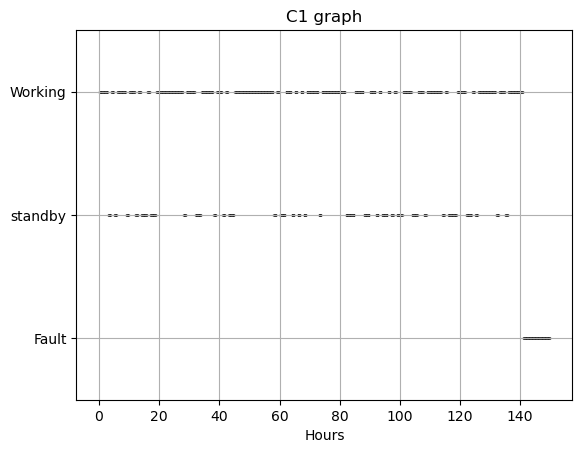

In [41]:
# θα μελετήσουμε τα εξαρτήματα στον χρόνο με επιδιόρθωση
C1=Compartment(37,0.7,10,2)
C2=Compartment(20,1,10,2)
C1_working=np.ones(time.shape[0])
C2_working=np.ones(time.shape[0])
for i in range(0,time.shape[0]):
    if (   round( i % 10 , 2) ==0 ):
        C1.refresh()
        C2.refresh()
    # πολ/ζω για να βγει ωραίο το plot
    C1_working[i]=C1.state*0.1
    C2_working[i]=0.1 if C2.state==1 else 0
    
# plot
plt.scatter(time,C1_working,s=0.1,color='black')
# για λόγους ομοιόμορφης εμφάνισης
plt.ylim(-0.15,0.15)
# δίνουμε ονόμα στον άξονα y
plt.yticks(ticks=[-0.1,0,0.1],labels=['Fault','standby','Working'])
plt.xlabel('Hours')
plt.title('C1 graph')
plt.grid()
plt.show()

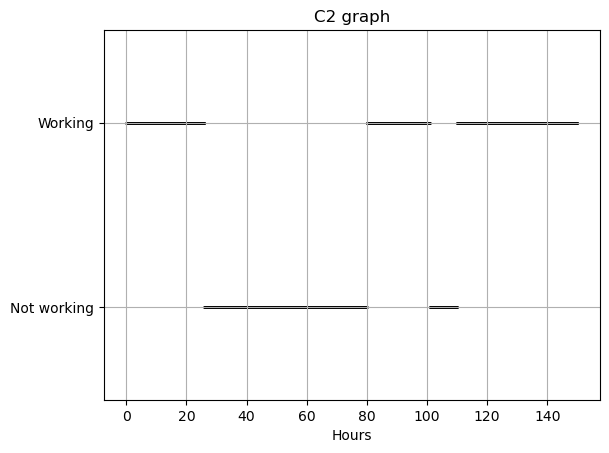

In [42]:
plt.scatter(time,C2_working,s=1,color='black')
plt.ylim(-0.05,0.15)
plt.yticks(ticks=[0,0.1],labels=['Not working','Working'])
plt.xlabel('Hours')
plt.grid()
plt.title('C2 graph')
plt.show()

In [43]:
# θα τρέξουμε 100 επαναλήψεις για να υπολογίσουμε πειραματικές τιμές των μεγεθών
MTBF=np.zeros(100)
MUT=np.zeros(100)
Av=np.zeros(100)
MTR=np.zeros(100)
for j in range(0,100):
    C1=Compartment(37,0.7,10,2)
    # counter για πόσες φορές έπαθε βλάβη
    counter=0
    C1_working=np.ones(time.shape[0])
    for i in range(0,time.shape[0]):
        if (   round( i%10 , 2) ==0 ):
            # κρατάμε την κατάσταση του εξαρτήματος πριν και μετά το refresh
            temp1=C1.state
            C1.refresh()
            temp2=C1.state
            # αν λειτουργούσε και έπαθε βλάβη τότε αυξάνουμε τον counter
            if (temp1==1 and temp2==-1):
                counter +=1
        C1_working[i]=C1.state
        
    # mean up time ορίζεται ως η περίοδος σωστής λειτουργίας
    MU=(np.where(C1_working==1))[0].shape[0]/10
    
    # mean down time ορίζεται ως οι υπόλοιπες
    MD=150-MU
    
    # θα χρειαστούμε και τις ώρες που το εξάρτημα δεν λειτουργεί λόγω duty cycle
    dutytime=(np.where(C1_working==0))[0].shape[0]/10
    brokentime=(np.where(C1_working==-1))[0].shape[0]/10
    
    # τύπος διαθεσιμότητας
    A=MU/(MD+MU)
    MUT[j]=MU
    Av[j]=A
    
    # αν δεν έχει πάθει βλάβη τότε MTBF θεωρούμε 0 το ίδιο και MTTR
    if (counter==0):
        MTBF[j]=0
        MTR[j]=0
    # αν έχει πάθει βλάβη
    else:
        # MTTR ορίζεται ως οι ώρες με βλάβη προς πόσες φορές είχαμε βλάβη
        MTR[j]=brokentime/counter
        # MTBF ορίζεται ως οι ώρες που δεν είχαμε βλάβη προς πόσες φορές είχαμε βλάβη
        MTBF[j]=(MU+dutytime )/counter
        
# με μέθοδο των τριών : στις 37+10  ώρες οι 37*0.7 είναι καλής λειτουργίας
#                       στις 150 ώρες x
uptime=150*C1.MTTF*C1.Duty_Cycle/(C1.MTTF+C1.MTTR)
downtime=150-uptime

print('Testing MTBF:',MTBF.mean() ,'\nTesting MUT:', MUT.mean() ,
      '\nTesting Availability:' ,Av.mean(),'\nTesting MTTR:' ,MTR.mean())

print('\nFormula MTBF:',C1.MTTR+C1.MTTF/C1.Duty_Cycle ,'\nFormula MUT:', uptime ,
      '\nFormula Availability:' ,uptime/150,'\nFormula MTTR:' ,C1.MTTR )

Testing MTBF: 76.5055 
Testing MUT: 91.09 
Testing Availability: 0.6072666666666666 
Testing MTTR: 11.769499999999999

Formula MTBF: 62.85714285714286 
Formula MUT: 82.6595744680851 
Formula Availability: 0.551063829787234 
Formula MTTR: 10


In [44]:
# παρόμοια διαδικασία για το C2
MTBF=np.zeros(100)
MUT=np.zeros(100)
Av=np.zeros(100)
MTR=np.zeros(100)
for j in range(0,100):
    C2=Compartment(20,1,10,2)
    # counter για πόσες φορές έπαθε βλάβη
    counter=0
    C2_working=np.ones(time.shape[0])
    for i in range(0,time.shape[0]):
        if (   round( i%10 , 2) ==0 ):
            # κρατάμε την κατάσταση του εξαρτήματος πριν και μετά το refresh
            temp1=C2.state
            C2.refresh()
            temp2=C2.state
            # αν λειτουργούσε και έπαθε βλάβη τότε αυξάνουμε τον counter
            if (temp1==1 and temp2==-1):
                counter +=1
        C2_working[i]=C2.state
        
    # mean up time ορίζεται ως η περίοδος σωστής λειτουργίας
    MU=(np.where(C2_working==1))[0].shape[0]/10
    
    # mean down time ορίζεται ως οι υπόλοιπες
    MD=150-MU
    
    # τύπος διαθεσιμότητας
    A=MU/(MD+MU)
    MUT[j]=MU
    Av[j]=A
    
    # αν δεν έχει πάθει βλάβη τότε MTBF θεωρούμε 0 το ίδιο και MTTR
    if (counter==0):
        MTBF[j]=0
        MTR[j]=0
    # αν έχει πάθει βλάβη
    else:
        # MTTR ορίζεται ως οι ώρες με βλάβη προς πόσες φορές είχαμε βλάβη
        MTR[j]=MD/counter
        # MTBF ορίζεται ως οι ώρες που δεν είχαμε βλάβη προς πόσες φορές είχαμε βλάβη
        MTBF[j]=MU/counter
        
# με μέθοδο των τριών : στις 37+10  ώρες οι 37*1 είναι καλής λειτουργίας
#                       στις 150 ώρες x
uptime=150*C2.MTTF*C2.Duty_Cycle/(C2.MTTF+C2.MTTR)
downtime=150-uptime

print('Testing MTBF:',MTBF.mean() ,'\nTesting MUT:', MUT.mean() ,
      '\nTesting Availability:' ,Av.mean(),'\nTesting MTTR:' ,MTR.mean())

print('\nFormula MTBF:',C2.MTTR+C2.MTTF/C2.Duty_Cycle ,'\nFormula MUT:', uptime ,
      '\nFormula Availability:' ,uptime/150,'\nFormula MTTR:' ,C2.MTTR )

Testing MTBF: 25.656892857142857 
Testing MUT: 102.21 
Testing Availability: 0.6814 
Testing MTTR: 10.70917857142857

Formula MTBF: 30.0 
Formula MUT: 100.0 
Formula Availability: 0.6666666666666666 
Formula MTTR: 10


In [49]:
ll1=0.015
ll2=0.038

In [51]:
1/(5*ll2/6 + 2*ll1 )

16.216216216216218

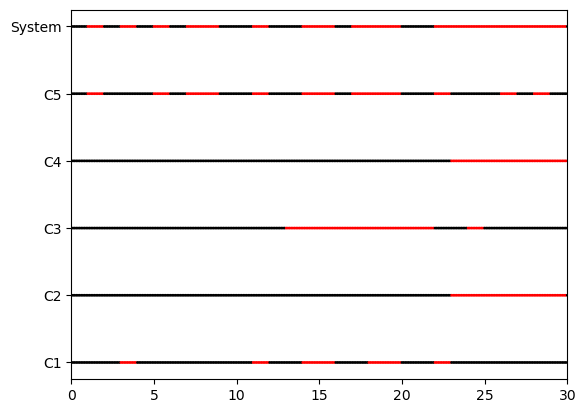

In [47]:
# παρόμοια διαδικασία με το πρώτο μ΄έρος αλλά τώρα έχουμε επιδιόρθωση
C1=Compartment(37,0.7,10,2)
C2=Compartment(20,1,10,2)
C3=Compartment(20,1,10,2)
C4=Compartment(20,1,10,2)
C5=Compartment(37,0.7,10,2)
working=np.ones(time.shape[0])*0.9
C1_working=np.ones(time.shape[0])
C2_working=np.ones(time.shape[0])
C3_working=np.ones(time.shape[0])
C4_working=np.ones(time.shape[0])
C5_working=np.ones(time.shape[0])
counter=0

for i in range(1,time.shape[0]):
    if (   round( i % 10 , 2) ==0 ):
        C1.refresh()
        C1_working[i:i+10]=1 if C1.state==1 else 0 
        
        C2.refresh()
        C2_working[i:i+10]=1 if C2.state==1 else 0
        
        C3.refresh()        
        C3_working[i:i+10]=1 if C3.state==1 else 0
        
        C4.refresh()
        C4_working[i:i+10]=1 if C4.state==1 else 0
        
        C5.refresh()
        C5_working[i:i+10]=1 if C5.state==1 else 0
    
        if ( (C1_working[i] and C5_working[i] and (C2_working[i]+C3_working[i]+C4_working[i]  >1) ) != 1 ):
            working[i:i+10]=0
            counter+=1
    

C1_colors=match_colors(C1_working)
C2_colors=match_colors(C2_working)
C3_colors=match_colors(C3_working)
C4_colors=match_colors(C4_working)
C5_colors=match_colors(C5_working)
system_colors=match_colors(working)

# πολ/ζω για το plot
plt.scatter(time,np.ones(time.shape[0])*0.15,color=C1_colors,s=1)
plt.scatter(time,np.ones(time.shape[0])*0.3,color=C2_colors,s=1)
plt.scatter(time,np.ones(time.shape[0])*0.45,color=C3_colors,s=1)
plt.scatter(time,np.ones(time.shape[0])*0.6,color=C4_colors,s=1)
plt.scatter(time,np.ones(time.shape[0])*0.75,color=C5_colors,s=1)
plt.scatter(time,np.ones(time.shape[0])*0.9,color=system_colors,s=1)

plt.yticks(ticks=[0.15,0.3,0.45,0.6,0.75,0.9],labels=['C1','C2','C3','C4','C5','System'])
plt.xlim(0,30)
plt.show()

In [64]:
mttr=np.zeros(100)
mtbf=np.zeros(100)
av=np.zeros(100)
uptime=np.zeros(100)

for j in range(0,100):
    C1=Compartment(37,0.7,10,2)
    C2=Compartment(20,1,10,2)
    C3=Compartment(20,1,10,2)
    C4=Compartment(20,1,10,2)
    C5=Compartment(37,0.7,10,2)
    working=np.ones(time.shape[0])*0.9
    C1_working=np.ones(time.shape[0])
    C2_working=np.ones(time.shape[0])
    C3_working=np.ones(time.shape[0])
    C4_working=np.ones(time.shape[0])
    C5_working=np.ones(time.shape[0])
    counter=0

    for i in range(1,time.shape[0]):
        if (   round( i % 10 , 2) ==0 ):
            C1.refresh()
            C1_working[i:i+10]=1 if C1.state==1 else 0 

            C2.refresh()
            C2_working[i:i+10]=1 if C2.state==1 else 0

            C3.refresh()        
            C3_working[i:i+10]=1 if C3.state==1 else 0

            C4.refresh()
            C4_working[i:i+10]=1 if C4.state==1 else 0

            C5.refresh()
            C5_working[i:i+10]=1 if C5.state==1 else 0

            if ( (C1_working[i] and C5_working[i] and (C2_working[i]+C3_working[i]+C4_working[i]  >1) ) != 1 ):
                working[i:i+10]=0
                counter+=1
    uptime[j]=(np.where(working==0.9))[0].shape[0]/10
    mttr[j]=(np.where(working==0))[0].shape[0]/counter
    av[j]=(np.where(working==0.9))[0].shape[0]/1500
    mtbf[j]=(np.where(working==0.9))[0].shape[0]/counter
    
print('System MUT:', uptime.mean() , '\nSystem MTTR: ',mttr.mean(),
      '\nSystem  Availability:', av.mean(), ' \nSystem MTBF:', mtbf.mean())

System MUT: 42.25 
System MTTR:  10.0 
System  Availability: 0.2816666666666666  
System MTBF: 4.059842535763443


In [61]:
print('System MUT:', uptime.mean() , '\nSystem MTTR: ',mttr.mean(),
      '\nSystem  Availability:', av.mean(), ' \nSystem MTBF:', mtbf.mean())

System MUT: 43.14 
System MTTR:  10.0 
System  Availability: 0.2876000000000001  
System MTBF: 4.194980898184081
